# Performing Regression Estimators API (tf.contrib.learn)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Load and prepare the data

In [2]:
current_dir = os.getcwd()
dataset_path = os.path.join(os.getcwd(), os.pardir,'data','diamond_prices_original.csv')
diamonds = pd.read_csv(dataset_path)
TARGET = 'price'

In [3]:
## Separating into training and testing: the objects we got back are pandas DataFrames.
X_train, X_val, y_train, y_val = train_test_split(diamonds.drop(TARGET, axis=1),
                                                  diamonds[TARGET],
                                                  train_size=0.9,
                                                  random_state=60)

In [4]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## 2. Write one or more dataset importing functions

In [5]:
BATCH_SIZE = 128
N_EPOCHS = 400
## Training input function
input_fn_train = tf.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    num_epochs=N_EPOCHS,
    shuffle = True,
    target_column=TARGET)

## Validation input function
input_fn_val = tf.estimator.inputs.pandas_input_fn(
    x=X_val,
    y=y_val,
    num_epochs=1,
    shuffle = False,
    target_column=TARGET)

## 3. Define the feature columns

#### Numerical features

Since we have only few of them let's define them explicitly. The following cell does the same as:
~~~~
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_feature_cols = [tf.feature_column.numeric_column(col) for col in numerical_cols]
~~~~

In [6]:
carat = tf.feature_column.numeric_column('carat')
depth = tf.feature_column.numeric_column('depth')
table = tf.feature_column.numeric_column('table')
x = tf.feature_column.numeric_column('x')
y = tf.feature_column.numeric_column('y')
z = tf.feature_column.numeric_column('z')

numeric_feature_cols = [carat, depth, table, x, y, z]

#### Categorical features

From the documentation:

>To feed sparse features into DNN models, wrap the column with `embedding_column` or `indicator_column`. `indicator_column` is recommended for features with only a few possible values. For features with many possible values, to reduce the size of your model, `embedding_column` is recommended.

In [7]:
categorical_cols = ['cut', 'color', 'clarity']
unique_values = {col: list(diamonds[col].unique()) for col in categorical_cols}
categorical_feature_cols = [tf.feature_column.categorical_column_with_vocabulary_list(col, values) \
                           for col, values in unique_values.items()]

categorical_feature_cols = [tf.feature_column.indicator_column(col) \
                            for col in categorical_feature_cols]

## 4. Instantiate the DNNRegressor Estimator

In [8]:
reg_model = tf.estimator.DNNRegressor(
    feature_columns= numeric_feature_cols + categorical_feature_cols,
    hidden_units=[128, 64, 32],
    model_dir='./high_level_api_regression',
    optimizer='Adam')
# Loss is calculated by using mean squared error.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './high_level_api_regression', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CE92766BA8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 5. Train the model

In [9]:
reg_model.train(input_fn=input_fn_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./high_level_api_regression\model.ckpt.
INFO:tensorflow:loss = 4.36377e+09, step = 1
INFO:tensorflow:global_step/sec: 267.837
INFO:tensorflow:loss = 9.22142e+07, step = 101 (0.378 sec)
INFO:tensorflow:global_step/sec: 319.34
INFO:tensorflow:loss = 8.09456e+07, step = 201 (0.312 sec)
INFO:tensorflow:global_step/sec: 370.354
INFO:tensorflow:loss = 2.1084e+08, step = 301 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.424
INFO:tensorflow:loss = 1.94623e+08, step = 401 (0.269 sec)
INFO:tensorflow:global_step/sec: 373.248
INFO:tensorflow:loss = 1.07927e+08, step = 501 (0.265 sec)
INFO:tensorflow:global_step/sec: 347.503
INFO:tensorflow:loss = 5.97992e+07, step = 601 (0.288 sec)
INFO:tensorflow:global_step/sec: 357.512
INFO:tensorflow:loss = 1.22129e+08, step = 701 (0.283 sec)
INFO:tensorflow:global_step/sec: 370.16
INFO:tensorflow:loss = 6.96402e+07, step = 801 (0.283 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 326.08
INFO:tensorflow:loss = 1.14452e+08, step = 8101 (0.291 sec)
INFO:tensorflow:global_step/sec: 353.002
INFO:tensorflow:loss = 4.20339e+07, step = 8201 (0.283 sec)
INFO:tensorflow:global_step/sec: 381.014
INFO:tensorflow:loss = 6.63335e+07, step = 8301 (0.275 sec)
INFO:tensorflow:global_step/sec: 355.518
INFO:tensorflow:loss = 8.20808e+07, step = 8401 (0.281 sec)
INFO:tensorflow:global_step/sec: 349.026
INFO:tensorflow:loss = 9.3196e+07, step = 8501 (0.271 sec)
INFO:tensorflow:global_step/sec: 367.23
INFO:tensorflow:loss = 6.59908e+07, step = 8601 (0.290 sec)
INFO:tensorflow:global_step/sec: 332.391
INFO:tensorflow:loss = 5.70974e+07, step = 8701 (0.283 sec)
INFO:tensorflow:global_step/sec: 369.002
INFO:tensorflow:loss = 9.45436e+07, step = 8801 (0.287 sec)
INFO:tensorflow:global_step/sec: 360.174
INFO:tensorflow:loss = 5.7931e+07, step = 8901 (0.280 sec)
INFO:tensorflow:global_step/sec: 350.966
INFO:tensorflow:loss = 7.54578e+07, step = 9001 (0.267

INFO:tensorflow:global_step/sec: 284.143
INFO:tensorflow:loss = 4.97532e+07, step = 16201 (0.349 sec)
INFO:tensorflow:global_step/sec: 362.67
INFO:tensorflow:loss = 9.0864e+07, step = 16301 (0.276 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 3.08246e+07, step = 16401 (0.284 sec)
INFO:tensorflow:global_step/sec: 339.232
INFO:tensorflow:loss = 5.2293e+07, step = 16501 (0.295 sec)
INFO:tensorflow:global_step/sec: 356.194
INFO:tensorflow:loss = 7.53291e+07, step = 16601 (0.282 sec)
INFO:tensorflow:global_step/sec: 349.944
INFO:tensorflow:loss = 7.15365e+07, step = 16701 (0.284 sec)
INFO:tensorflow:global_step/sec: 369.385
INFO:tensorflow:loss = 4.50369e+07, step = 16801 (0.271 sec)
INFO:tensorflow:global_step/sec: 363.993
INFO:tensorflow:loss = 1.01003e+08, step = 16901 (0.275 sec)
INFO:tensorflow:global_step/sec: 368.023
INFO:tensorflow:loss = 5.46454e+07, step = 17001 (0.271 sec)
INFO:tensorflow:global_step/sec: 336.941
INFO:tensorflow:loss = 5.00859e+07, step = 1

INFO:tensorflow:global_step/sec: 369.386
INFO:tensorflow:loss = 6.5673e+07, step = 24301 (0.270 sec)
INFO:tensorflow:global_step/sec: 375.583
INFO:tensorflow:loss = 1.07308e+08, step = 24401 (0.266 sec)
INFO:tensorflow:global_step/sec: 363.993
INFO:tensorflow:loss = 2.76348e+07, step = 24501 (0.274 sec)
INFO:tensorflow:global_step/sec: 365.328
INFO:tensorflow:loss = 3.92567e+07, step = 24601 (0.275 sec)
INFO:tensorflow:global_step/sec: 361.356
INFO:tensorflow:loss = 5.98136e+07, step = 24701 (0.276 sec)
INFO:tensorflow:global_step/sec: 358.755
INFO:tensorflow:loss = 3.3377e+07, step = 24801 (0.280 sec)
INFO:tensorflow:global_step/sec: 348.634
INFO:tensorflow:loss = 3.56974e+07, step = 24901 (0.286 sec)
INFO:tensorflow:global_step/sec: 360.702
INFO:tensorflow:loss = 4.88176e+07, step = 25001 (0.277 sec)
INFO:tensorflow:global_step/sec: 368.704
INFO:tensorflow:loss = 3.85772e+07, step = 25101 (0.272 sec)
INFO:tensorflow:global_step/sec: 371.269
INFO:tensorflow:loss = 4.25384e+07, step = 

INFO:tensorflow:global_step/sec: 324.867
INFO:tensorflow:loss = 6.06319e+07, step = 32401 (0.306 sec)
INFO:tensorflow:global_step/sec: 309.734
INFO:tensorflow:loss = 7.3596e+07, step = 32501 (0.323 sec)
INFO:tensorflow:global_step/sec: 343.001
INFO:tensorflow:loss = 5.4869e+07, step = 32601 (0.293 sec)
INFO:tensorflow:global_step/sec: 359.535
INFO:tensorflow:loss = 3.73333e+07, step = 32701 (0.278 sec)
INFO:tensorflow:global_step/sec: 317.624
INFO:tensorflow:loss = 5.80584e+07, step = 32801 (0.314 sec)
INFO:tensorflow:global_step/sec: 314.619
INFO:tensorflow:loss = 4.88208e+07, step = 32901 (0.318 sec)
INFO:tensorflow:global_step/sec: 379.119
INFO:tensorflow:loss = 4.87691e+07, step = 33001 (0.264 sec)
INFO:tensorflow:global_step/sec: 381.262
INFO:tensorflow:loss = 6.46152e+07, step = 33101 (0.262 sec)
INFO:tensorflow:global_step/sec: 384.365
INFO:tensorflow:loss = 7.40909e+07, step = 33201 (0.264 sec)
INFO:tensorflow:global_step/sec: 374.328
INFO:tensorflow:loss = 8.43524e+07, step = 

INFO:tensorflow:global_step/sec: 347.565
INFO:tensorflow:loss = 4.77132e+07, step = 40501 (0.276 sec)
INFO:tensorflow:global_step/sec: 370.104
INFO:tensorflow:loss = 9.17657e+07, step = 40601 (0.271 sec)
INFO:tensorflow:global_step/sec: 365.655
INFO:tensorflow:loss = 5.78417e+07, step = 40701 (0.281 sec)
INFO:tensorflow:global_step/sec: 341.857
INFO:tensorflow:loss = 5.01807e+07, step = 40801 (0.284 sec)
INFO:tensorflow:global_step/sec: 356.123
INFO:tensorflow:loss = 4.68367e+07, step = 40901 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.226
INFO:tensorflow:loss = 6.60351e+07, step = 41001 (0.283 sec)
INFO:tensorflow:global_step/sec: 368.486
INFO:tensorflow:loss = 5.63779e+07, step = 41101 (0.268 sec)
INFO:tensorflow:global_step/sec: 347.88
INFO:tensorflow:loss = 7.423e+07, step = 41201 (0.290 sec)
INFO:tensorflow:global_step/sec: 348.734
INFO:tensorflow:loss = 4.64367e+07, step = 41301 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.996
INFO:tensorflow:loss = 4.64813e+07, step = 4

INFO:tensorflow:global_step/sec: 332.843
INFO:tensorflow:loss = 4.90695e+07, step = 48601 (0.286 sec)
INFO:tensorflow:global_step/sec: 402.497
INFO:tensorflow:loss = 5.36003e+07, step = 48701 (0.245 sec)
INFO:tensorflow:global_step/sec: 354.937
INFO:tensorflow:loss = 4.54053e+07, step = 48801 (0.285 sec)
INFO:tensorflow:global_step/sec: 370.079
INFO:tensorflow:loss = 1.01823e+08, step = 48901 (0.270 sec)
INFO:tensorflow:global_step/sec: 360.095
INFO:tensorflow:loss = 2.01571e+07, step = 49001 (0.278 sec)
INFO:tensorflow:global_step/sec: 396.814
INFO:tensorflow:loss = 4.33689e+07, step = 49101 (0.249 sec)
INFO:tensorflow:global_step/sec: 342.038
INFO:tensorflow:loss = 3.03643e+07, step = 49201 (0.294 sec)
INFO:tensorflow:global_step/sec: 360.051
INFO:tensorflow:loss = 7.43269e+07, step = 49301 (0.278 sec)
INFO:tensorflow:global_step/sec: 383.583
INFO:tensorflow:loss = 5.41025e+07, step = 49401 (0.259 sec)
INFO:tensorflow:global_step/sec: 380.09
INFO:tensorflow:loss = 4.39454e+07, step =

INFO:tensorflow:global_step/sec: 324.221
INFO:tensorflow:loss = 6.0481e+07, step = 56701 (0.310 sec)
INFO:tensorflow:global_step/sec: 370.754
INFO:tensorflow:loss = 3.57768e+07, step = 56801 (0.255 sec)
INFO:tensorflow:global_step/sec: 375.712
INFO:tensorflow:loss = 3.0257e+07, step = 56901 (0.282 sec)
INFO:tensorflow:global_step/sec: 333.715
INFO:tensorflow:loss = 4.76918e+07, step = 57001 (0.287 sec)
INFO:tensorflow:global_step/sec: 362.63
INFO:tensorflow:loss = 5.45818e+07, step = 57101 (0.273 sec)
INFO:tensorflow:global_step/sec: 336.303
INFO:tensorflow:loss = 6.20661e+07, step = 57201 (0.300 sec)
INFO:tensorflow:global_step/sec: 357.47
INFO:tensorflow:loss = 4.8074e+07, step = 57301 (0.280 sec)
INFO:tensorflow:global_step/sec: 378.69
INFO:tensorflow:loss = 3.38675e+07, step = 57401 (0.261 sec)
INFO:tensorflow:global_step/sec: 374.316
INFO:tensorflow:loss = 3.68686e+07, step = 57501 (0.285 sec)
INFO:tensorflow:global_step/sec: 353.872
INFO:tensorflow:loss = 1.50588e+07, step = 5760

INFO:tensorflow:global_step/sec: 344.205
INFO:tensorflow:loss = 2.91763e+07, step = 64801 (0.276 sec)
INFO:tensorflow:global_step/sec: 375.736
INFO:tensorflow:loss = 4.23402e+07, step = 64901 (0.275 sec)
INFO:tensorflow:global_step/sec: 367.239
INFO:tensorflow:loss = 5.26583e+07, step = 65001 (0.273 sec)
INFO:tensorflow:global_step/sec: 350.52
INFO:tensorflow:loss = 5.87056e+07, step = 65101 (0.275 sec)
INFO:tensorflow:global_step/sec: 357.47
INFO:tensorflow:loss = 4.6169e+07, step = 65201 (0.281 sec)
INFO:tensorflow:global_step/sec: 387.138
INFO:tensorflow:loss = 4.49555e+07, step = 65301 (0.268 sec)
INFO:tensorflow:global_step/sec: 326.32
INFO:tensorflow:loss = 4.89402e+07, step = 65401 (0.295 sec)
INFO:tensorflow:global_step/sec: 313.015
INFO:tensorflow:loss = 4.30513e+07, step = 65501 (0.324 sec)
INFO:tensorflow:global_step/sec: 397.018
INFO:tensorflow:loss = 4.68414e+07, step = 65601 (0.259 sec)
INFO:tensorflow:global_step/sec: 376.989
INFO:tensorflow:loss = 3.64852e+07, step = 65

INFO:tensorflow:global_step/sec: 384.412
INFO:tensorflow:loss = 5.42505e+07, step = 72901 (0.259 sec)
INFO:tensorflow:global_step/sec: 374.9
INFO:tensorflow:loss = 5.20079e+07, step = 73001 (0.260 sec)
INFO:tensorflow:global_step/sec: 377.054
INFO:tensorflow:loss = 4.36745e+07, step = 73101 (0.270 sec)
INFO:tensorflow:global_step/sec: 355.159
INFO:tensorflow:loss = 4.26156e+07, step = 73201 (0.272 sec)
INFO:tensorflow:global_step/sec: 366.761
INFO:tensorflow:loss = 7.53414e+07, step = 73301 (0.268 sec)
INFO:tensorflow:global_step/sec: 352.217
INFO:tensorflow:loss = 7.20592e+07, step = 73401 (0.284 sec)
INFO:tensorflow:global_step/sec: 360.996
INFO:tensorflow:loss = 2.60746e+07, step = 73501 (0.277 sec)
INFO:tensorflow:global_step/sec: 353.239
INFO:tensorflow:loss = 6.35426e+07, step = 73601 (0.283 sec)
INFO:tensorflow:global_step/sec: 352.011
INFO:tensorflow:loss = 5.10303e+07, step = 73701 (0.284 sec)
INFO:tensorflow:global_step/sec: 354.568
INFO:tensorflow:loss = 3.9025e+07, step = 7

INFO:tensorflow:global_step/sec: 354.653
INFO:tensorflow:loss = 2.64629e+07, step = 81001 (0.282 sec)
INFO:tensorflow:global_step/sec: 356.001
INFO:tensorflow:loss = 3.82787e+07, step = 81101 (0.281 sec)
INFO:tensorflow:global_step/sec: 372.044
INFO:tensorflow:loss = 3.88086e+07, step = 81201 (0.284 sec)
INFO:tensorflow:global_step/sec: 352.27
INFO:tensorflow:loss = 4.50079e+07, step = 81301 (0.284 sec)
INFO:tensorflow:global_step/sec: 352.802
INFO:tensorflow:loss = 3.93515e+07, step = 81401 (0.268 sec)
INFO:tensorflow:global_step/sec: 353.637
INFO:tensorflow:loss = 5.47131e+07, step = 81501 (0.283 sec)
INFO:tensorflow:global_step/sec: 354.053
INFO:tensorflow:loss = 2.84855e+07, step = 81601 (0.282 sec)
INFO:tensorflow:global_step/sec: 373.391
INFO:tensorflow:loss = 1.59622e+07, step = 81701 (0.268 sec)
INFO:tensorflow:global_step/sec: 352.691
INFO:tensorflow:loss = 2.38898e+07, step = 81801 (0.284 sec)
INFO:tensorflow:global_step/sec: 354.666
INFO:tensorflow:loss = 2.79776e+07, step =

INFO:tensorflow:global_step/sec: 377.78
INFO:tensorflow:loss = 4.75782e+07, step = 89101 (0.265 sec)
INFO:tensorflow:global_step/sec: 363.994
INFO:tensorflow:loss = 2.82058e+07, step = 89201 (0.274 sec)
INFO:tensorflow:global_step/sec: 377.779
INFO:tensorflow:loss = 4.97922e+07, step = 89301 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.219
INFO:tensorflow:loss = 4.58119e+07, step = 89401 (0.264 sec)
INFO:tensorflow:global_step/sec: 372.142
INFO:tensorflow:loss = 4.65755e+07, step = 89501 (0.269 sec)
INFO:tensorflow:global_step/sec: 373.537
INFO:tensorflow:loss = 3.10917e+07, step = 89601 (0.268 sec)
INFO:tensorflow:global_step/sec: 374.941
INFO:tensorflow:loss = 2.5512e+07, step = 89701 (0.266 sec)
INFO:tensorflow:global_step/sec: 356.193
INFO:tensorflow:loss = 4.32577e+07, step = 89801 (0.282 sec)
INFO:tensorflow:global_step/sec: 284.955
INFO:tensorflow:loss = 5.06939e+07, step = 89901 (0.351 sec)
INFO:tensorflow:global_step/sec: 311.67
INFO:tensorflow:loss = 2.33459e+07, step = 9

INFO:tensorflow:global_step/sec: 379.218
INFO:tensorflow:loss = 4.36454e+07, step = 97201 (0.264 sec)
INFO:tensorflow:global_step/sec: 354.925
INFO:tensorflow:loss = 5.67287e+07, step = 97301 (0.283 sec)
INFO:tensorflow:global_step/sec: 374.942
INFO:tensorflow:loss = 4.22093e+07, step = 97401 (0.266 sec)
INFO:tensorflow:global_step/sec: 370.759
INFO:tensorflow:loss = 5.04326e+07, step = 97501 (0.269 sec)
INFO:tensorflow:global_step/sec: 366.651
INFO:tensorflow:loss = 5.18922e+07, step = 97601 (0.273 sec)
INFO:tensorflow:global_step/sec: 360.071
INFO:tensorflow:loss = 3.26729e+07, step = 97701 (0.279 sec)
INFO:tensorflow:global_step/sec: 366.669
INFO:tensorflow:loss = 3.53237e+07, step = 97801 (0.273 sec)
INFO:tensorflow:global_step/sec: 353.666
INFO:tensorflow:loss = 3.14102e+07, step = 97901 (0.283 sec)
INFO:tensorflow:global_step/sec: 323.814
INFO:tensorflow:loss = 3.07484e+07, step = 98001 (0.310 sec)
INFO:tensorflow:global_step/sec: 374.941
INFO:tensorflow:loss = 6.844e+07, step = 

INFO:tensorflow:loss = 1.82496e+07, step = 105201 (0.276 sec)
INFO:tensorflow:global_step/sec: 358.755
INFO:tensorflow:loss = 8.56818e+07, step = 105301 (0.279 sec)
INFO:tensorflow:global_step/sec: 352.418
INFO:tensorflow:loss = 4.31392e+07, step = 105401 (0.284 sec)
INFO:tensorflow:global_step/sec: 354.927
INFO:tensorflow:loss = 3.12759e+07, step = 105501 (0.282 sec)
INFO:tensorflow:global_step/sec: 351.178
INFO:tensorflow:loss = 3.253e+07, step = 105601 (0.284 sec)
INFO:tensorflow:global_step/sec: 354.926
INFO:tensorflow:loss = 6.01761e+07, step = 105701 (0.283 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 3.35513e+07, step = 105801 (0.283 sec)
INFO:tensorflow:global_step/sec: 343.912
INFO:tensorflow:loss = 4.4541e+07, step = 105901 (0.291 sec)
INFO:tensorflow:global_step/sec: 353.668
INFO:tensorflow:loss = 4.40075e+07, step = 106001 (0.283 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 4.57672e+07, step = 106101 (0.283 sec)
INFO:tensorflo

INFO:tensorflow:loss = 3.22951e+07, step = 113201 (0.287 sec)
INFO:tensorflow:global_step/sec: 346.301
INFO:tensorflow:loss = 5.21152e+07, step = 113301 (0.289 sec)
INFO:tensorflow:global_step/sec: 340.343
INFO:tensorflow:loss = 4.8475e+07, step = 113401 (0.294 sec)
INFO:tensorflow:global_step/sec: 345.067
INFO:tensorflow:loss = 2.27581e+07, step = 113501 (0.290 sec)
INFO:tensorflow:global_step/sec: 343.911
INFO:tensorflow:loss = 3.62118e+07, step = 113601 (0.292 sec)
INFO:tensorflow:global_step/sec: 348.716
INFO:tensorflow:loss = 2.95331e+07, step = 113701 (0.286 sec)
INFO:tensorflow:global_step/sec: 348.725
INFO:tensorflow:loss = 5.90807e+07, step = 113801 (0.287 sec)
INFO:tensorflow:global_step/sec: 348.681
INFO:tensorflow:loss = 1.00193e+08, step = 113901 (0.287 sec)
INFO:tensorflow:global_step/sec: 343.922
INFO:tensorflow:loss = 5.2994e+07, step = 114001 (0.291 sec)
INFO:tensorflow:global_step/sec: 343.938
INFO:tensorflow:loss = 2.90239e+07, step = 114101 (0.291 sec)
INFO:tensorfl

INFO:tensorflow:loss = 4.63965e+07, step = 121201 (0.307 sec)
INFO:tensorflow:global_step/sec: 304.998
INFO:tensorflow:loss = 3.24303e+07, step = 121301 (0.327 sec)
INFO:tensorflow:global_step/sec: 400.6
INFO:tensorflow:loss = 3.17506e+07, step = 121401 (0.257 sec)
INFO:tensorflow:global_step/sec: 377.828
INFO:tensorflow:loss = 5.89582e+07, step = 121501 (0.258 sec)
INFO:tensorflow:global_step/sec: 393.631
INFO:tensorflow:loss = 3.30073e+07, step = 121601 (0.253 sec)
INFO:tensorflow:global_step/sec: 389.991
INFO:tensorflow:loss = 7.07072e+07, step = 121701 (0.261 sec)
INFO:tensorflow:global_step/sec: 305.563
INFO:tensorflow:loss = 3.17243e+07, step = 121801 (0.324 sec)
INFO:tensorflow:global_step/sec: 378.634
INFO:tensorflow:loss = 2.86218e+07, step = 121901 (0.263 sec)
INFO:tensorflow:global_step/sec: 386.608
INFO:tensorflow:loss = 3.83441e+07, step = 122001 (0.259 sec)
INFO:tensorflow:global_step/sec: 393.056
INFO:tensorflow:loss = 2.44682e+07, step = 122101 (0.261 sec)
INFO:tensorfl

INFO:tensorflow:loss = 2.34151e+07, step = 129201 (0.271 sec)
INFO:tensorflow:global_step/sec: 377.343
INFO:tensorflow:loss = 3.37523e+07, step = 129301 (0.269 sec)
INFO:tensorflow:global_step/sec: 376.393
INFO:tensorflow:loss = 4.14109e+07, step = 129401 (0.274 sec)
INFO:tensorflow:global_step/sec: 336.508
INFO:tensorflow:loss = 2.47658e+07, step = 129501 (0.296 sec)
INFO:tensorflow:global_step/sec: 348.294
INFO:tensorflow:loss = 5.301e+07, step = 129601 (0.285 sec)
INFO:tensorflow:global_step/sec: 353.311
INFO:tensorflow:loss = 8.03655e+07, step = 129701 (0.279 sec)
INFO:tensorflow:global_step/sec: 352.821
INFO:tensorflow:loss = 4.32825e+07, step = 129801 (0.274 sec)
INFO:tensorflow:global_step/sec: 354.465
INFO:tensorflow:loss = 4.56096e+07, step = 129901 (0.287 sec)
INFO:tensorflow:global_step/sec: 353.457
INFO:tensorflow:loss = 3.46943e+07, step = 130001 (0.282 sec)
INFO:tensorflow:global_step/sec: 352.556
INFO:tensorflow:loss = 4.41824e+07, step = 130101 (0.288 sec)
INFO:tensorfl

INFO:tensorflow:loss = 4.40245e+07, step = 137201 (0.274 sec)
INFO:tensorflow:global_step/sec: 355.07
INFO:tensorflow:loss = 5.91023e+07, step = 137301 (0.276 sec)
INFO:tensorflow:global_step/sec: 374.858
INFO:tensorflow:loss = 2.65575e+07, step = 137401 (0.273 sec)
INFO:tensorflow:global_step/sec: 354.228
INFO:tensorflow:loss = 2.84878e+07, step = 137501 (0.277 sec)
INFO:tensorflow:global_step/sec: 353.893
INFO:tensorflow:loss = 1.81804e+07, step = 137601 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.198
INFO:tensorflow:loss = 8.39122e+07, step = 137701 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.184
INFO:tensorflow:loss = 3.66422e+07, step = 137801 (0.282 sec)
INFO:tensorflow:global_step/sec: 372.908
INFO:tensorflow:loss = 9.46422e+07, step = 137901 (0.275 sec)
INFO:tensorflow:global_step/sec: 352.784
INFO:tensorflow:loss = 2.08124e+07, step = 138001 (0.286 sec)
INFO:tensorflow:global_step/sec: 353.518
INFO:tensorflow:loss = 2.85082e+07, step = 138101 (0.283 sec)
INFO:tensorf

INFO:tensorflow:loss = 3.85728e+07, step = 145201 (0.277 sec)
INFO:tensorflow:global_step/sec: 374.477
INFO:tensorflow:loss = 5.33762e+07, step = 145301 (0.271 sec)
INFO:tensorflow:global_step/sec: 374.807
INFO:tensorflow:loss = 2.88184e+07, step = 145401 (0.267 sec)
INFO:tensorflow:global_step/sec: 375.495
INFO:tensorflow:loss = 4.48486e+07, step = 145501 (0.275 sec)
INFO:tensorflow:global_step/sec: 335.361
INFO:tensorflow:loss = 2.79128e+07, step = 145601 (0.282 sec)
INFO:tensorflow:global_step/sec: 373.49
INFO:tensorflow:loss = 5.42337e+07, step = 145701 (0.270 sec)
INFO:tensorflow:global_step/sec: 375.06
INFO:tensorflow:loss = 5.89069e+07, step = 145801 (0.274 sec)
INFO:tensorflow:global_step/sec: 352.172
INFO:tensorflow:loss = 6.58389e+07, step = 145901 (0.282 sec)
INFO:tensorflow:global_step/sec: 354.326
INFO:tensorflow:loss = 3.58793e+07, step = 146001 (0.275 sec)
INFO:tensorflow:global_step/sec: 374.594
INFO:tensorflow:loss = 5.42701e+07, step = 146101 (0.277 sec)
INFO:tensorfl

## 6. Visualize/analyze the results of the model

In [10]:
reg_model.evaluate(input_fn=input_fn_val)

INFO:tensorflow:Starting evaluation at 2018-02-01-20:31:26
INFO:tensorflow:Restoring parameters from ./high_level_api_regression\model.ckpt-151707
INFO:tensorflow:Finished evaluation at 2018-02-01-20:31:26
INFO:tensorflow:Saving dict for global step 151707: average_loss = 451885.0, global_step = 151707, loss = 5.66853e+07


{'average_loss': 451884.81, 'global_step': 151707, 'loss': 56685272.0}

In [11]:
## This returns an iterator
predictions = reg_model.predict(input_fn=input_fn_val)
## Transform the values to a pandas series
predictions = pd.Series([x['predictions'][0] for x in predictions], index=y_val.index)

INFO:tensorflow:Restoring parameters from ./high_level_api_regression\model.ckpt-151707


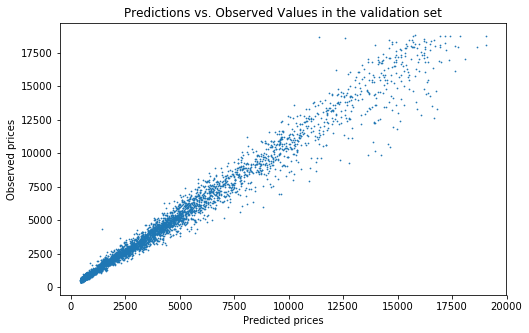

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=predictions, y=y_val, s=0.5)
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices')
ax.set_title("Predictions vs. Observed Values in the validation set");

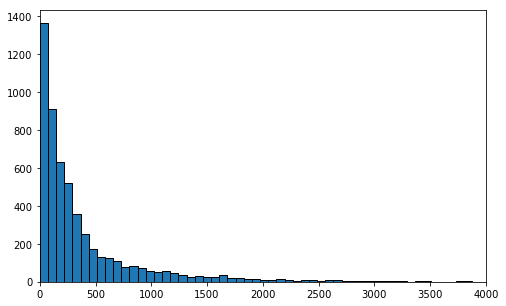

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(abs(y_val-predictions), bins=100, edgecolor='black')
ax.set_xlim(0, 4e3);